In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
# Files to Load 
joined_csv = "./clean_output/joined2.csv"
fips_csv = "./resources/florida_fips.csv"
reg_yr_csv = "./clean_output/county_by_year_transv.csv"

In [3]:
# Read the data into Pandas DataFrames 
joined_df = pd.read_csv(joined_csv)
fips_df = pd.read_csv(fips_csv)
yr_reg_df = pd.read_csv(reg_yr_csv, parse_dates=['date'])
joined_df


,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,county2,2017,2018,2019,2020,2021,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
0,Alachua,766,699,2454,2774,Alachua,12.0,5.0,5.0,7.0,12.0,17.0,22.0,29.0,41.0
1,Baker,5,12,41,42,Baker,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,Bay,300,237,876,972,Bay,8.0,0.0,1.0,4.0,3.0,8.0,9.0,13.0,16.0
3,Bradford,22,9,35,39,Bradford,2.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
4,Brevard,1881,1657,6088,6843,Brevard,26.0,5.0,5.0,16.0,17.0,31.0,36.0,52.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Volusia,1079,903,3371,3796,Volusia,22.0,4.0,8.0,14.0,9.0,26.0,34.0,48.0,57.0
64,Wakulla,25,21,76,90,Wakulla,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
65,Walton,211,171,649,772,Walton,7.0,1.0,1.0,4.0,1.0,8.0,9.0,13.0,14.0
66,Washington,13,10,25,30,Washington,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [4]:
joined_df = joined_df.drop(['county2','2017', '2018','2019','2020','2021'],axis=1)
joined_df = joined_df.drop(67)
joined_df

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
0,Alachua,766,699,2454,2774,17.0,22.0,29.0,41.0
1,Baker,5,12,41,42,0.0,1.0,1.0,1.0
2,Bay,300,237,876,972,8.0,9.0,13.0,16.0
3,Bradford,22,9,35,39,2.0,2.0,2.0,2.0
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0
...,...,...,...,...,...,...,...,...,...
62,Lafayette,1801,1778,6221,7489,NaN,NaN,NaN,NaN
63,Volusia,1079,903,3371,3796,26.0,34.0,48.0,57.0
64,Wakulla,25,21,76,90,0.0,0.0,0.0,4.0
65,Walton,211,171,649,772,8.0,9.0,13.0,14.0


In [5]:
#Shape of dataset
joined_df.shape

(67, 9)

In [6]:
# Info on dataset
null_data_joined = joined_df[joined_df.isna().any(axis=1)]
null_data_joined.to_csv('./clean_output/no_reg_counties.csv')
null_data_joined

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
6,Calhoun,5,5,11,14,NaN,NaN,NaN,NaN
14,Dixie,2,3,8,7,NaN,NaN,NaN,NaN
19,Gadsden,25,22,78,80,NaN,NaN,NaN,NaN
20,Gilchrist,10,13,39,38,NaN,NaN,NaN,NaN
21,Glades,5,4,21,24,NaN,NaN,NaN,NaN
24,Hardee,6,4,30,29,NaN,NaN,NaN,NaN
29,Holmes,8,6,10,10,NaN,NaN,NaN,NaN
36,Levy,23,24,82,106,NaN,NaN,NaN,NaN
37,Liberty,7,4,12,13,NaN,NaN,NaN,NaN
38,Madison,4,2,22,29,NaN,NaN,NaN,NaN


In [7]:
# Describe our dataset
joined_df.sort_values("2021_Fl_reg",ascending=False).head(45)

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
12,Dade,9559,7936,29977,34827,162.0,223.0,312.0,435.0
5,Broward,7942,6542,23689,26767,91.0,123.0,171.0,243.0
48,Palm Beach,7943,6131,22458,25106,83.0,106.0,144.0,214.0
46,Orange,5245,4830,17617,19980,133.0,165.0,226.0,331.0
28,Hillsborough,4420,3849,14000,16110,77.0,104.0,135.0,186.0
50,Pinellas,3508,3014,10590,11760,62.0,92.0,128.0,196.0
62,Lafayette,1801,1778,6221,7489,NaN,NaN,NaN,NaN
15,Duval,2059,1733,6101,6878,52.0,83.0,123.0,159.0
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0
34,Lee,1764,1463,5628,6683,26.0,32.0,39.0,55.0


In [8]:
# joined_df['2018'] = (['2018_Total_Stations'].astype(float) / joined_df['2018_Fl_reg'].astype(float))
joined_df['2018'] = (joined_df['2018_Total_Stations'] / joined_df['2018_Fl_reg'])*100
joined_df['2019'] = (joined_df['2019_Total_Stations'] / joined_df['2019_Fl_reg'])*100
joined_df['2020'] = (joined_df['2020_Total_Stations'] / joined_df['2020_Fl_reg'])*100
joined_df['2021'] = (joined_df['2021_Total_Stations'] / joined_df['2021_Fl_reg'])*100

joined_df['2019_%increase'] = ((joined_df['2019_Fl_reg'] - joined_df['2018_Fl_reg']) / joined_df['2018_Fl_reg'])*100
joined_df['2020_%increase'] = ((joined_df['2020_Fl_reg'] - joined_df['2019_Fl_reg']) / joined_df['2019_Fl_reg'])*100
joined_df['2021_%increase'] = ((joined_df['2021_Fl_reg'] - joined_df['2020_Fl_reg']) / joined_df['2020_Fl_reg'])*100

In [9]:
joined_df.sort_values("2021_Fl_reg",ascending=False).head(45)

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations,2018,2019,2020,2021,2019_%increase,2020_%increase,2021_%increase
12,Dade,9559,7936,29977,34827,162.0,223.0,312.0,435.0,1.694738,2.809980,1.040798,1.249031,-16.978763,277.734375,16.179071
5,Broward,7942,6542,23689,26767,91.0,123.0,171.0,243.0,1.145807,1.880159,0.721854,0.907834,-17.627802,262.106389,12.993372
48,Palm Beach,7943,6131,22458,25106,83.0,106.0,144.0,214.0,1.044945,1.728919,0.641197,0.852386,-22.812539,266.302398,11.790899
46,Orange,5245,4830,17617,19980,133.0,165.0,226.0,331.0,2.535748,3.416149,1.282852,1.656657,-7.912297,264.741201,13.413180
28,Hillsborough,4420,3849,14000,16110,77.0,104.0,135.0,186.0,1.742081,2.702001,0.964286,1.154562,-12.918552,263.730839,15.071429
50,Pinellas,3508,3014,10590,11760,62.0,92.0,128.0,196.0,1.767389,3.052422,1.208687,1.666667,-14.082098,251.360319,11.048159
62,Lafayette,1801,1778,6221,7489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.277068,249.887514,20.382575
15,Duval,2059,1733,6101,6878,52.0,83.0,123.0,159.0,2.525498,4.789383,2.016063,2.311719,-15.832929,252.048471,12.735617
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0,1.648060,2.172601,0.854139,1.008330,-11.908559,267.410984,12.401445
34,Lee,1764,1463,5628,6683,26.0,32.0,39.0,55.0,1.473923,2.187286,0.692964,0.822984,-17.063492,284.688995,18.745558


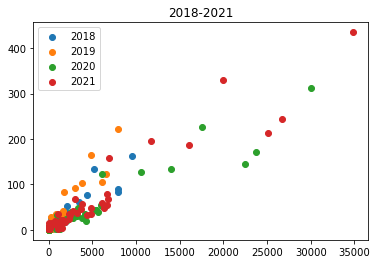

In [10]:
import matplotlib.pylab as plt
mydata = joined_df[["2018_Fl_reg", "2018_Total_Stations"]]#.dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1],label=f'2018')
mydata2 = joined_df[["2019_Fl_reg", "2019_Total_Stations"]]#.dropna(how="any")
vals2 = mydata2.values
plt.scatter(vals2[:, 0], vals2[:, 1],label=f'2019')
mydata3 = joined_df[["2020_Fl_reg", "2020_Total_Stations"]]#.dropna(how="any")
vals3 = mydata3.values
plt.scatter(vals3[:, 0], vals3[:, 1],label=f'2020')
mydata4 = joined_df[["2021_Fl_reg", "2021_Total_Stations"]]#.dropna(how="any")
vals4 = mydata4.values
plt.scatter(vals4[:, 0], vals4[:, 1],label=f'2021')

# Plot
plt.title('2018-2021')
plt.legend()
plt.show()

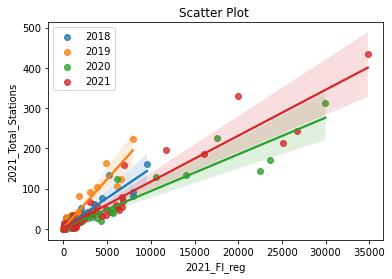

In [11]:
sns.regplot(x='2018_Fl_reg', y='2018_Total_Stations',label=f'2018', data=joined_df) 
sns.regplot(x='2019_Fl_reg', y='2019_Total_Stations',label=f'2019', data=joined_df)
sns.regplot(x='2020_Fl_reg', y='2020_Total_Stations',label=f'2020', data=joined_df)
sns.regplot(x='2021_Fl_reg', y='2021_Total_Stations',label=f'2021', data=joined_df)
plt.legend()
plt.title("Scatter Plot ");

In [12]:
joined_dft = joined_df.transpose()
joined_dft = joined_dft.drop('county')

joined_df2 = joined_dft.iloc[:,:].sum(axis=1)
joined_sum_df3 = pd.DataFrame (joined_df2, columns = ['sum'])


In [13]:
joined_sum_df3


,sum
2018_Fl_reg,67209.000000
2019_Fl_reg,56980.000000
2020_Fl_reg,209378.000000
2021_Fl_reg,238849.000000
2018_Total_Stations,1127.000000
2019_Total_Stations,1480.000000
2020_Total_Stations,2015.000000
2021_Total_Stations,2824.000000
2018,345.677740
2019,346.100379


In [14]:
joined_dft

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
2018_Fl_reg,766,5,300,22,1881,7942,5,398,201,382,...,601,282,20,1,1,1801,1079,25,211,13
2019_Fl_reg,699,12,237,9,1657,6542,5,362,161,297,...,523,255,16,6,2,1778,903,21,171,10
2020_Fl_reg,2454,41,876,35,6088,23689,11,1314,637,1051,...,2046,859,56,18,12,6221,3371,76,649,25
2021_Fl_reg,2774,42,972,39,6843,26767,14,1489,750,1184,...,2400,952,61,20,16,7489,3796,90,772,30
2018_Total_Stations,17.0,0.0,8.0,2.0,31.0,91.0,NaN,2.0,6.0,3.0,...,17.0,4.0,0.0,1.0,1.0,NaN,26.0,0.0,8.0,0.0
2019_Total_Stations,22.0,1.0,9.0,2.0,36.0,123.0,NaN,2.0,9.0,5.0,...,17.0,4.0,1.0,2.0,1.0,NaN,34.0,0.0,9.0,0.0
2020_Total_Stations,29.0,1.0,13.0,2.0,52.0,171.0,NaN,3.0,10.0,7.0,...,25.0,5.0,1.0,3.0,1.0,NaN,48.0,0.0,13.0,1.0
2021_Total_Stations,41.0,1.0,16.0,2.0,69.0,243.0,NaN,5.0,19.0,7.0,...,32.0,9.0,1.0,6.0,1.0,NaN,57.0,4.0,14.0,1.0
2018,2.219321,0.0,2.666667,9.090909,1.64806,1.145807,NaN,0.502513,2.985075,0.78534,...,2.828619,1.41844,0.0,100.0,100.0,NaN,2.409639,0.0,3.791469,0.0
2019,3.147353,8.333333,3.797468,22.222222,2.172601,1.880159,NaN,0.552486,5.590062,1.683502,...,3.250478,1.568627,6.25,33.333333,50.0,NaN,3.765227,0.0,5.263158,0.0


In [15]:
yr_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          4 non-null      object
 1   Alachua       4 non-null      int64 
 2   Baker         4 non-null      int64 
 3   Bay           4 non-null      int64 
 4   Bradford      4 non-null      int64 
 5   Brevard       4 non-null      int64 
 6   Broward       4 non-null      int64 
 7   Calhoun       4 non-null      int64 
 8   Charlotte     4 non-null      int64 
 9   Citrus        4 non-null      int64 
 10  Clay          4 non-null      int64 
 11  Collier       4 non-null      int64 
 12  Columbia      4 non-null      int64 
 13  Dade          4 non-null      int64 
 14  Desoto        4 non-null      int64 
 15  Dixie         4 non-null      int64 
 16  Duval         4 non-null      int64 
 17  Escambia      4 non-null      int64 
 18  Flagler       4 non-null      int64 
 19  Franklin    

In [16]:
yr_reg_df = yr_reg_df.set_index('date')

In [17]:
a=1
test_df = yr_reg_df.iloc[:,:a]
series = test_df
series
#  a=3
#  x = "county"
#  y1 = a
# series = yr_reg_df[[x, y1]]
# yr_reg_df

# mydata4 = joined_df[["2021_Fl_reg", "2021_Total_Stations"]]#.dropna(how="any")
# vals4 = mydata4.values
# plt.scatter(vals4[:, 0], vals4[:, 1],label=f'2021')

,Alachua
date,
2018_Fl_reg,766
2019_Fl_reg,699
2020_Fl_reg,2454
2021_Fl_reg,2774


In [18]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [19]:
stepwise_fit = auto_arima(series,trace = True,supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=72.535, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=70.185, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=71.716, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=73.845, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.223 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    4
Model:                        SARIMAX   Log Likelihood                 -33.092
Date:                Wed, 08 Jun 2022   AIC                             70.185
Time:                        18:45:26   BIC                             68.957
Sample:                             0   HQIC                            67.491
                                  - 4                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1673.2500    480.687      3.481      0.000     731.120    2615.380
sigma2      8.984e+05   3.76e+06      0.239      0.811   -6.47e+06    8.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.44   Prob(JB):                         0.73
Heteroskedasticity (H):                nan   Skew:                             0.04
Prob(H) (two-sided):                   nan   Kurtosis:                         1.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.arima_model import ARIMA

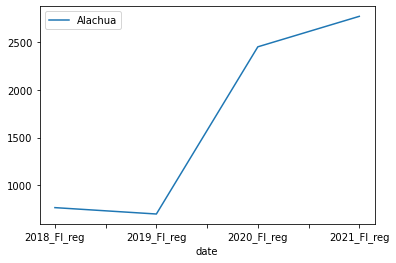

In [26]:
series.plot()
plt.show()

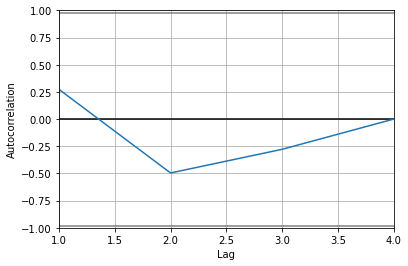

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                Alachua   No. Observations:                    4
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -25.071
Date:                Wed, 08 Jun 2022   AIC                             52.141
Time:                        18:50:09   BIC                             51.240
Sample:                             0   HQIC                            50.330
                                  - 4                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.061e+06   9.11e+05      1.165      0.244   -7.24e+05    2.85e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.08   Pr

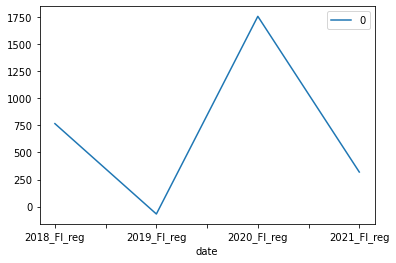

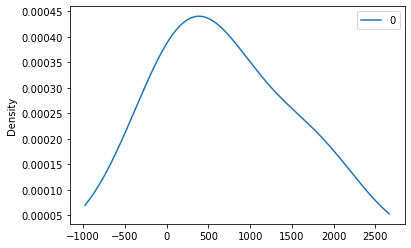

                 0
count     4.000000
mean    693.500000
std     785.260254
min     -67.000000
25%     223.250000
50%     543.000000
75%    1013.250000
max    1755.000000


In [28]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(series, order=(0,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [29]:
# walk-forward validation
for t in range(len(test)):
	model2 = ARIMA(history, order=(5,1,0))
	model2_fit = model2.fit()
	output = model2_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

NameError: name 'test' is not defined

In [15]:
# # Plot
# # "2018_Fl_reg", "2018_Total_Stations"
# # "2018_Fl_reg", "2018_Total_Stations"
# # "2018_Fl_reg", "2018_Total_Stations"
# # "2018_Fl_reg", "2018_Total_Stations"
# import numpy as np
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.scatter(vals[:, 0], vals[:, 1], label=f'y1 Correlation = {np.round(np.corrcoef(vals[:, 0], vals[:, 1])[0,1], 2)}')
# plt.scatter(vals2[:, 0], vals2[:, 1], label=f'y1 Correlation = {np.round(np.corrcoef(vals2[:, 0], vals2[:, 1])[0,1], 2)}')
# plt.scatter(vals3[:, 0], vals3[:, 1], label=f'y2 Correlation = {np.round(np.corrcoef(vals3[:, 0], vals3[:, 1])[0,1], 2)}')
# plt.scatter(vals4[:, 0], vals4[:, 1], label=f'y3 Correlation = {np.round(np.corrcoef(vals4[:, 0], vals4[:, 1])[0,1], 2)}')

# # Plot
# plt.title('Scatterplot and Correlations')
# plt.legend()
# plt.show()

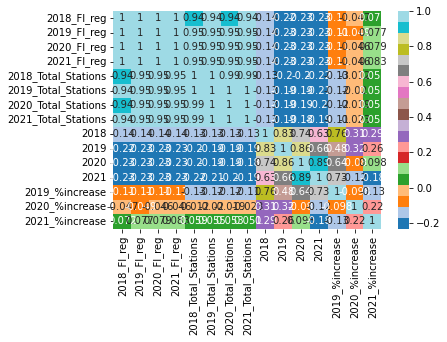

In [16]:
# Visualizing the data using heatmap
sns.heatmap(joined_df.corr(), cmap="tab20", annot = True)
plt.show()

In [17]:
# plt.scatter( joined_df.2018_Fl_reg,joined_df.2018_Total_Stations) ##NEEDS CHANGING
# plt.xlabel('Number of EVs')
# plt.ylabel('Number of charging stations')
# plt.show()

In [18]:
# X = df.YearsExperience.values.reshape(-1, 1) ##NEEDS CHANGING